In [418]:
#Covid Situation Analysis on the basis of no.of cases vs hospitals and beds[ICU,Ventilator,Simple]

In [168]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [396]:
dfv = pd.read_csv('hospital-ventilators-statewise.csv')
dfh = pd.read_csv("ICU-beds-statewise.csv")
dfb = pd.read_csv("hospital-statewise-india.csv")
dfi = pd.read_csv("hospital-bed-statewise.csv")

In [397]:
total = dfv['Total'].sum()
print("Total Ventilator in India are",total)

Total Ventilator in India are 47480


In [ ]:
#Daily Data API https://github.com/covid19india/api

In [170]:
dfc = pd.read_csv("raw_data26.csv")

In [185]:
dfc['Detected State'].unique()

array(['Mizoram', 'Telangana', 'Odisha', 'Puducherry', 'Goa', 'Nagaland',
       'Meghalaya', 'Karnataka', 'Andhra Pradesh', 'Uttar Pradesh',
       'Chandigarh', 'Manipur', 'Tamil Nadu', 'Kerala',
       'Jammu and Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Uttarakhand', 'Lakshadweep', 'Himachal Pradesh', 'Maharashtra',
       'Haryana', 'Madhya Pradesh', 'West Bengal', 'Punjab', 'Bihar',
       'Gujarat', 'Rajasthan', 'Assam', 'Arunachal Pradesh', 'Delhi',
       'Chhattisgarh', 'Jharkhand', 'Andaman and Nicobar Islands',
       'Sikkim', 'Ladakh', 'Tripura', nan], dtype=object)

In [172]:
tota = dfc[dfc['Current Status']=='Hospitalized']['Num Cases'].sum()
print("Total Active Cases in India are",tota)

Total Active Cases in India are 1008704.0


In [173]:
df1 = dfc[dfc['Date Announced']=='23/04/2021']
today_active = df1[df1['Current Status']=='Hospitalized']['Num Cases'].sum()
print("New cases of covid in India today are", today_active)

New cases of covid in India today are 345283.0


In [419]:
df1 = dfc[dfc['Date Announced']=='23/04/2021']
today = df1[df1['Current Status']=='Hospitalized']
statewise = today.groupby('State code').sum()
statewise_cases=statewise['Num Cases']

Text(0.5, 1.0, 'Covid India Daily Cases')

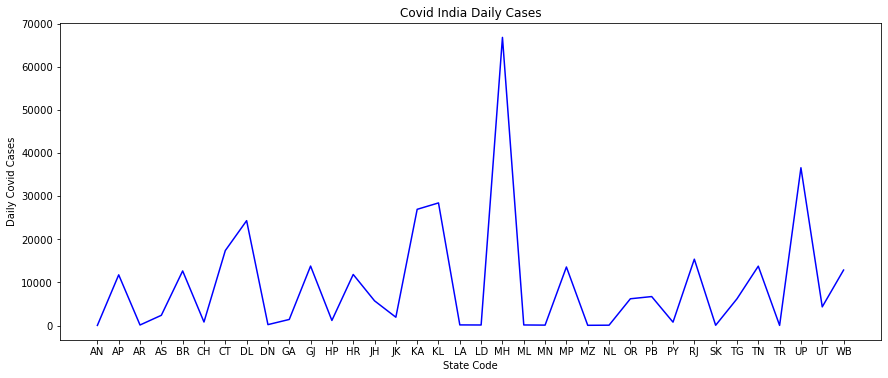

In [184]:
fig = plt.figure()
axes = fig.add_axes([1.1, 0.5, 1.9, 1.1])
axes.plot(statewise_cases.index, statewise_cases.values, 'b')
axes.set_xlabel('State Code')
axes.set_ylabel('Daily Covid Cases')
axes.set_title('Covid India Daily Cases')

In [395]:
today = dfc[dfc['Current Status']=='Hospitalized' ]
statewise = today.groupby('State code').sum()
statewise_cases=statewise['Num Cases']
statewise_cases.sum()


1008704.0

In [292]:
#statewise venitilators vs no. of cases

In [390]:
today = df1[df1['Current Status']=='Hospitalized']
statewise1 = today.groupby('Detected State').sum()

In [391]:
modified = statewise1.reset_index(level='Detected State')
modified = modified.rename(columns=({'Detected State': 'States'}), inplace = False)
statewise_beds=pd.merge(modified,dfv,on="States")

In [411]:
statewise_vbeds_cases = statewise_beds[['Num Cases','Total']]
statewise_vbeds_cases=statewise_vbeds_cases.set_index(statewise_beds['States'])

In [412]:
#statewise venitilators vs no. of cases

<AxesSubplot:xlabel='States'>

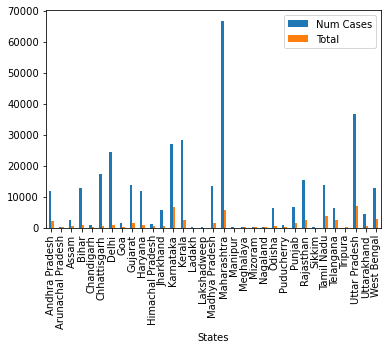

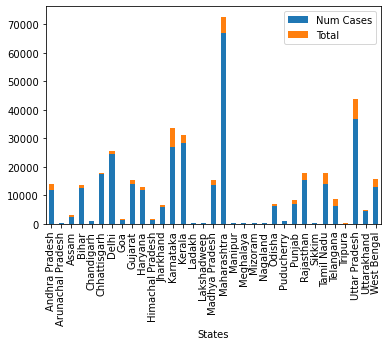

In [413]:
statewise_vbeds_cases.plot.bar()
statewise_vbeds_cases.plot.bar(stacked=True)

In [ ]:
#ICU beds statewise vs no. of cases

In [400]:
statewise_icu_beds = pd.merge(modified,dfh,on="States")
statewise_icu_beds_cases = statewise_icu_beds[['Num Cases','Total']]
statewise_icu_beds_cases=statewise_icu_beds_cases.set_index(statewise_icu_beds['States'])

<AxesSubplot:xlabel='States'>

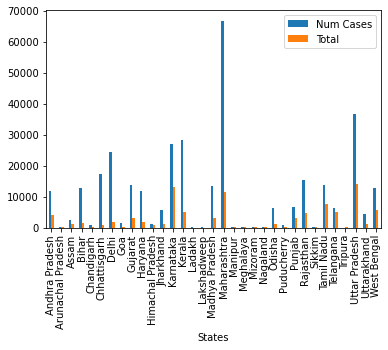

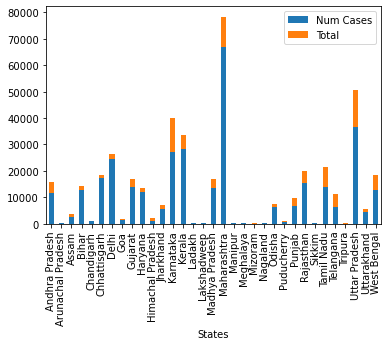

In [408]:
#Statewise ICU beds
statewise_icu_beds_cases.plot.bar()
statewise_icu_beds_cases.plot.bar(stacked=True)

In [406]:
#Hospitals statewise vs no. of cases

In [407]:
statewise_hospital = pd.merge(modified,dfb,on="States")
statewise_hospital_cases = statewise_hospital[['Num Cases','Total']]
statewise_hospital_cases=statewise_hospital_cases.set_index(statewise_icu_beds['States'])

<AxesSubplot:xlabel='States'>

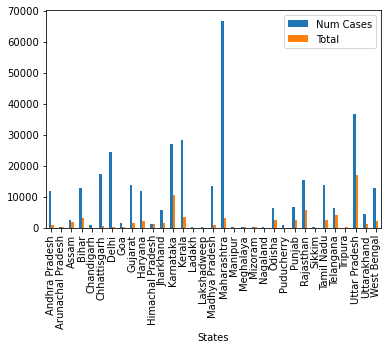

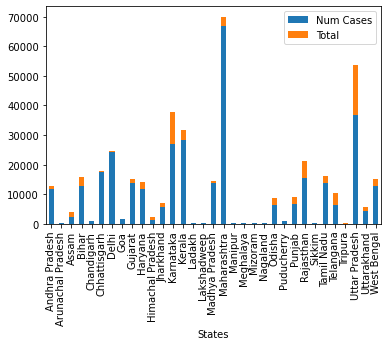

In [409]:
#Statewise Hospitals
statewise_hospital_cases.plot.bar()
statewise_hospital_cases.plot.bar(stacked=True)

In [410]:
#Hospitals beds statewise vs no. of cases

In [414]:
statewise_beds = pd.merge(modified,dfi,on="States")
statewise_beds_cases = statewise_beds[['Num Cases','Total']]
statewise_beds_cases=statewise_beds_cases.set_index(statewise_icu_beds['States'])

<AxesSubplot:xlabel='States'>

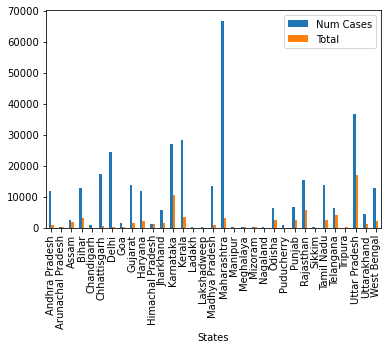

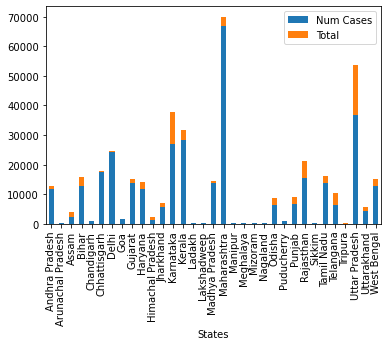

In [415]:
#Statewise Hospitals
statewise_hospital_cases.plot.bar()
statewise_hospital_cases.plot.bar(stacked=True)

In [422]:
#dataset is taken from below site which is paper under review
#https://cddep.org/wp-content/uploads/2020/04/State-wise-estimates-of-current-beds-and-ventilators_24Apr2020.pdf

In [423]:
#for daily cases covid tracking dataset is taken from below website
#Data is taken clean properly work is in progress so there might be slight/big errors
#Aim of analysis is to know insight from data of current situation and write some predictive model in future
#https://github.com/covid19india/api

In [424]:
#Thanks